# Seaborn Introduction

Although `matplotlib` is a capable and exhaustive library for data visualization, most of the time what we actually want is simple commands with sensible defaults. 

`Seaborn` does exactly that. 

It has fewer options (which can be limiting when creating complex diagrams), but its commands are far simpler. So most of the time people stick with Seaborn and only when we need something unique, we turn to matplotlib.

**NOTE**: seaborn uses matplotlib in the background, and so we can manipulate the seaborn diagrams using matplotlib commands

## Importing Data

In [3]:
import pandas as pd
import seaborn as sns

import os

In [4]:
df = pd.read_csv(os.path.join('DATA', 'dm_office_sales.csv'))

In [6]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


<br>

## Scatterplot

Let's first make a simple scatterplot with salary as the x-axis and sales as the y-axis. 

In a good organization their relationship should be increasing (mostly linear)

<AxesSubplot:xlabel='salary', ylabel='sales'>

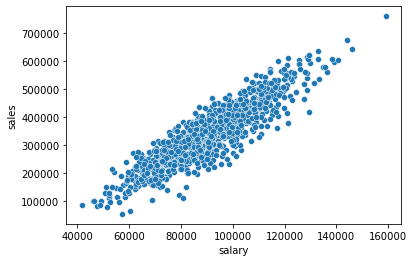

In [8]:
sns.scatterplot(x='salary', y='sales', data=df)

Notice that the relationship indeed looks to be linear (with some variation).

<br>

### Matplotlib Crashes the Party

Now let's manipulate this figure using matplotlib, by explicitly importing `matplotlib.pyplot`

**Notice** that so far we hadn't explicitly called matplotlib, seaborn implicitly uses matplotlib but does not provide direct access to it. (Much like keras and tensflow)

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='salary', ylabel='sales'>

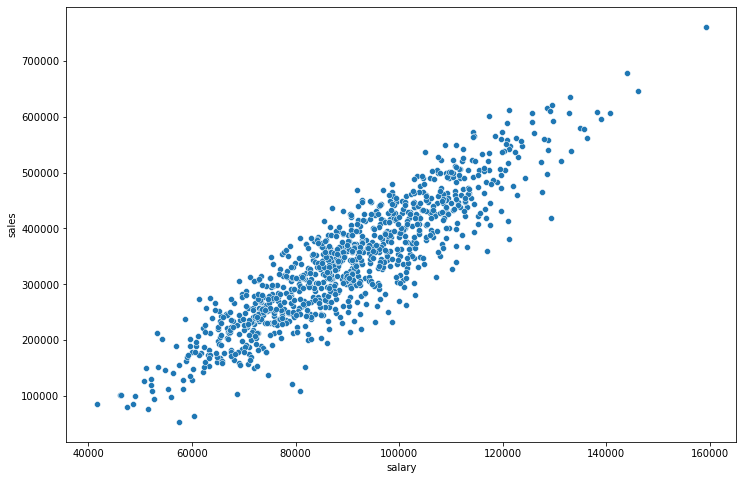

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df)

### Scatterplot Parameters

#### Hue Parameter

- The data points **change their color based on the value** of the hue parameter. 
- It needs to be a **categorical variable**

##### Example 1

<AxesSubplot:xlabel='salary', ylabel='sales'>

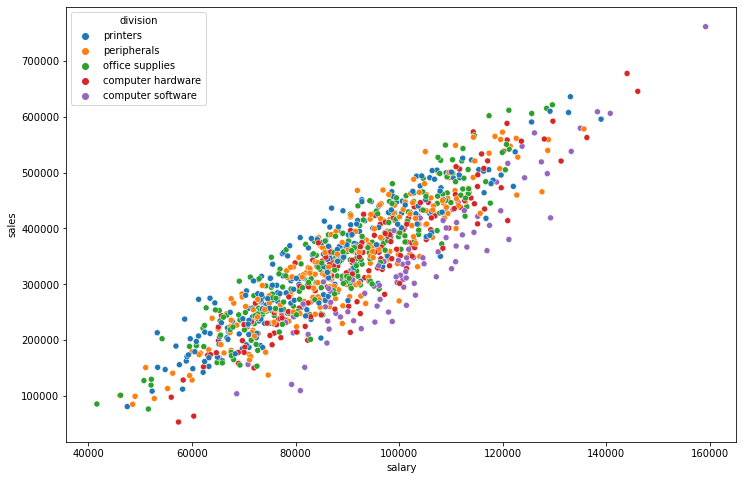

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, hue='division')

here hue takes the `division` column, which takes only 5 possible values (hence categorical variable)

##### Example 2

<AxesSubplot:xlabel='salary', ylabel='sales'>

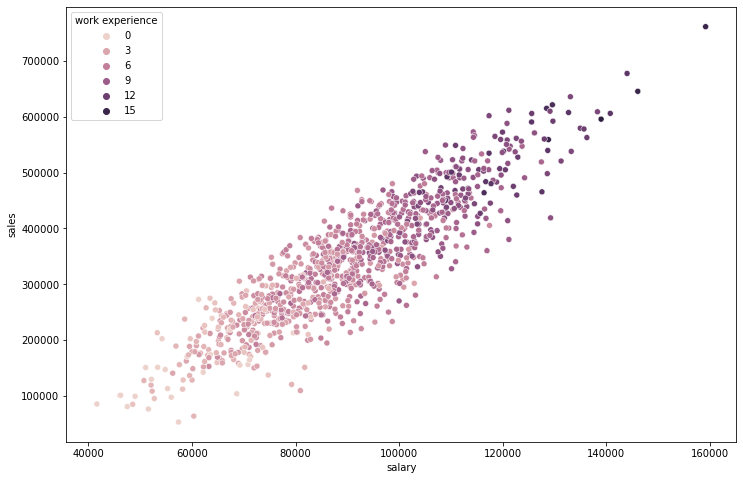

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, hue='work experience')

#### Palatte Parameter

Palatte changes the hue color

Choose a palette from Matplotlib's cmap: <https://matplotlib.org/stable/tutorials/colors/colormaps.html>